<img src="https://bit.ly/2VnXWr2" width="100" align="left">

# Temperature Sensor

There is a temperature sensor in the processor of your company's server. The company wants to analyze the data provided by the sensor to decide if they should change the cooling system for a better one. As changing the cooling system is expensive and you are an excellent data analyst, you can't make a decision without basis.

## Tools
You don't necessarily need to use all the tools. Maybe you opt to use some of them or completely different ones, they are given to help you shape the exercise. Programming exercises can be solved in many different ways.
1. Data structures: **lists**
2. Loops: **list comprehension**
3. Functions: **min, max, print, len**
4. Conditional statements: **if-elif-else**

## Tasks
The temperatures measured throughout the 24 hours of a day are:

In [2]:
temperatures_C = [33, 66, 65, 0, 59, 60, 62, 64, 70, 76, 80, 81, 80, 83, 90, 79, 61, 53, 50, 49, 53, 48, 45, 39]

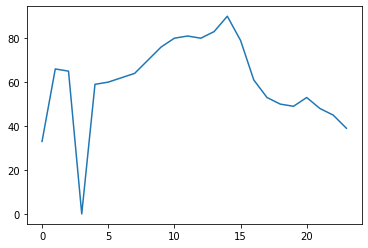

In [3]:
import matplotlib.pyplot as plt
plt.plot(temperatures_C)

The first element of the list is the temperature at 12am, the second element is the temperature at 1am, and so on. 

The company has decided that if one of the following events occurs, then the cooling system needs to be replaced for a new one to avoid damaging the processor.
* More than 4 temperatures are greater than or equal to 70ºC.
* Any temperature is above 80ºC.
* The average temperature exceeds 65ºC.

Follow the steps so that you can make the decision.

#### 1. Find the minimum temperature of the day and store it in a variable.

In [4]:
min_temp = min(temperatures_C)
print(min_temp)

0


#### 2. Find the maximum temperature of the day and store it in a variable.

In [5]:
max_temp = max(temperatures_C)
print(max_temp)

90


#### 3. Create a list with the temperatures that are greater than or equal to 70ºC. Store it in a variable.

In [6]:
sup_70 = [temp for temp in temperatures_C if temp >= 70]
print(sup_70)

[70, 76, 80, 81, 80, 83, 90, 79]


#### 4. Find the average temperature of the day and store it in a variable.

In [7]:
average_temp = sum(temperatures_C)/len(temperatures_C)
print(average_temp)

60.25


#### 5. Imagine that there was a sensor failure at 3am and the data for that specific hour was not recorded. How would you estimate the missing value? Replace the current value of the list at 3am for an estimation. 

In [15]:
temperatures_C[3] = int((65+59)/2)
print(temperatures_C)

[33, 66, 65, 62, 59, 60, 62, 64, 70, 76, 80, 81, 80, 83, 90, 79, 61, 53, 50, 49, 53, 48, 45, 39]


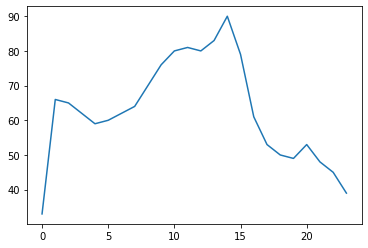

In [9]:
import matplotlib.pyplot as plt
plt.plot(temperatures_C)

#### 6. Bonus: the maintenance staff is from the United States and does not understand the international metric system. Help them by converting the temperatures from Celsius to Fahrenheit.
To know more about temperature conversion check this [link](https://en.wikipedia.org/wiki/Conversion_of_units_of_temperature).

**Formula**: 

$F = 1.8 * C + 32$

In [12]:
temperatures_F = [int(1.8 * temp + 32) for temp in temperatures_C]
print(temperatures_F)

[91, 150, 149, 143, 138, 140, 143, 147, 158, 168, 176, 177, 176, 181, 194, 174, 141, 127, 122, 120, 127, 118, 113, 102]


#### 7. Make a decision!
Now it's time to make a decision taking into account what you have seen until now. 

Remember that if one of the following events occurs, then the cooling system needs to be replaced for a new one to avoid damaging the processor.
* More than 4 temperatures are greater than or equal to 70ºC.
* Any temperature is above 80ºC.
* The average temperature exceeds 65ºC.

#### To make your decision, check if any of the three conditions above is met. You might need to use some of the variables you created in steps 1 to 6. Print a message to show if the cooling system needs to be changed or not.

In [17]:
if len(sup_70) > 4 or max_temp > 80 or average_temp > 65:
    print('The cooling system needs to be changed.')

The cooling system needs to be changed.


## Bonus

The company has decided that the decision you made is not valid. They want you to analyze the data again but this time, the conditions that need to be met in order to change the cooling system are different.

This time, if one of the following events occurs, then the cooling system needs to be replaced:
* The temperature is greater than 70ºC during more than 4 consecutive hours.
* Any temperature is above 80ºC.
* The average temperature exceeds 65ºC.

Follow the steps so that you can make the decision.

#### 1. Create a list with the hours where the temperature is greater than 70ºC. Store it in a variable.

In [71]:
sup_70_hours = [i for i in range(len(temperatures_C)) if temperatures_C[i] > 70]
print(sup_70_hours)

[9, 10, 11, 12, 13, 14, 15]


#### 2. Check if the list you created in step 1 has more than 4 consecutive hours. 

In [72]:
count = 1
max_count = count
for i in range(len(sup_70_hours)-1):
    if sup_70_hours[i] + 1 == sup_70_hours[i + 1]:
        count += 1
        if count > max_count:
            max_count = count
    else:
        count = 1
if max_count > 4:
    print('The list has more than 4 consecutive hours.')
else:
    print("The list has less than 4 consecutive hours.")

The list has more than 4 consecutive hours.


#### 3. Make the decision!
To make your decision, check if any of the three conditions is met. Print a message to show if the cooling system needs to be changed or not.

In [73]:
if max_count > 4 or max_temp > 80 or average_temp > 65:
    print('The cooling system needs to be changed.')

The cooling system needs to be changed.


#### 4. Find the average value of the temperature lists (ºC and ºF). What is the relation between both average values?

In [79]:
average_C = round(sum(temperatures_C)/len(temperatures_C), 0)
average_F = round(sum(temperatures_F)/len(temperatures_F), 0)
print(average_C)
print(average_F)

#The relation is : average_F = 1.8 * average_C + 32
print(1.8 * average_C + 32)

63.0
145.0
145.4


#### 5. Find the standard deviation of the temperature lists (ºC and ºF). What is the relation between both standard deviations?

In [89]:
def st_deviation(liste):
    average = sum(liste)/len(liste)
    ecarts_carres = [(elem - average)**2 for elem in liste]
    variance = sum(ecarts_carres)/len(ecarts_carres)
    return variance**(1/2)

print(st_deviation(temperatures_C))
print(st_deviation(temperatures_F))

#The relation is : st_deviation(temperatures_F) = 1.8 * st_deviation(temperatures_C)
print(1.8 * st_deviation(temperatures_C))

14.633485192833897
26.334355201692123
26.340273347101014
